In [4]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
from Tidesurf.data.exchange.binance.binance_trade_loader import BinanceTradeGenerativeLoader
from Tidesurf.utils.datetime_utils import to_timestamp
from Tidesurf.analytics.indicators.ema import EMA
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

In [6]:
dt = datetime(2022, 11, 20, 0, 0, 1)
binance_loader = BinanceTradeGenerativeLoader(
    ["/Volumes/Crypto_0/Binance", "/Volumes/Crypto_1/Binance"],
    "MATICUSD",
    to_timestamp(dt)
)
ema = EMA(60, to_timestamp(dt), 3)

while binance_loader.has_next():
    data = binance_loader.next()
    ema.append(data[1], [data[2], data[3]])

print(ema.indicator_values)

Got multiplier  0.5
Finished constructing top average,  [0.8721549921507065, 0.8721549921507065, 0.8721549921507065]
[0.8721549921507065, 0.8721549921507065, 0.8721549921507065, 0.8721549921507065, 0.8721549921507065, 0.8716774960753533, 0.8714387480376766, 0.8713193740188383, 0.8712596870094191, 0.8712298435047097, 0.8712149217523548, 0.8712074608761775, 0.8712037304380889, 0.8712018652190445, 0.8712009326095222, 0.8712004663047612, 0.8712002331523807, 0.8715001165761904, 0.8716500582880953, 0.8717250291440477, 0.871027625683135, 0.8706789239526787, 0.8705045730874504, 0.8704173976548364, 0.8702586988274181, 0.870179349413709, 0.8701396747068544, 0.8701198373534271, 0.8701099186767135, 0.8701549593383567, 0.8701774796691784, 0.8701887398345891, 0.8704943699172946, 0.8705471849586472, 0.8705735924793236, 0.8705867962396618, 0.8705933981198309, 0.8705966990599154, 0.8705983495299577, 0.8695309237754442, 0.8657413468106674, 0.8639493899962523, 0.8623884168221627, 0.8615410824454824, 0.86

In [23]:
x = np.array(ema.indicator_values)[:500]
x_neg = x * -1
peak_index_list, _ = find_peaks(x, distance=5)
bottom_index_list, _ = find_peaks(x_neg, distance=5)

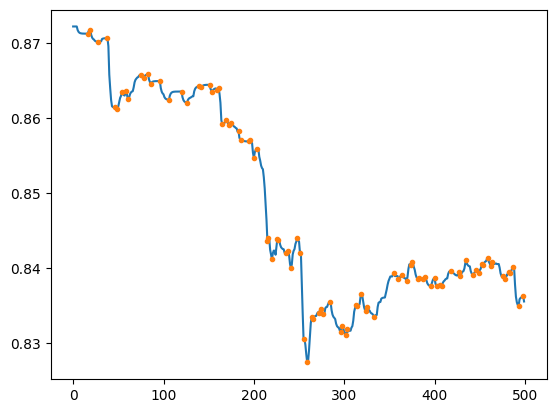

In [26]:
plt.plot(x)
plt.plot(np.concatenate((peak_index_list, bottom_index_list), axis=0), np.concatenate((x[peak_index_list], x[bottom_index_list]), axis=0), ".")
plt.show()

In [ ]:
# w shape consist of:
# h1, l1, h2, l2, (potential h3)

for h1_i_i in range(len(peak_index_list)):
    h1_i = peak_index_list[h1_i_i]
    h1 = x[h1_i]
    for l1_i_i in range(len(bottom_index_list)):
        l1_i = bottom